In [13]:
import numpy as np
import matplotlib.pyplot as plt
from implicit_euler import implicit_euler
from explicit_euler import explicit_euler

In [8]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y = implicit_euler(f,y,k,tol=1e-3)

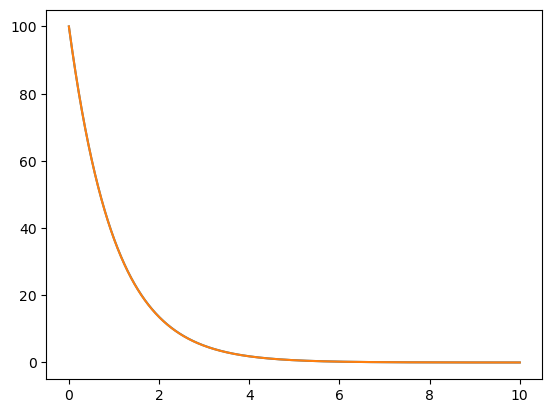

In [11]:
plt.plot(t,y)
plt.plot(t,100*np.exp(-t))

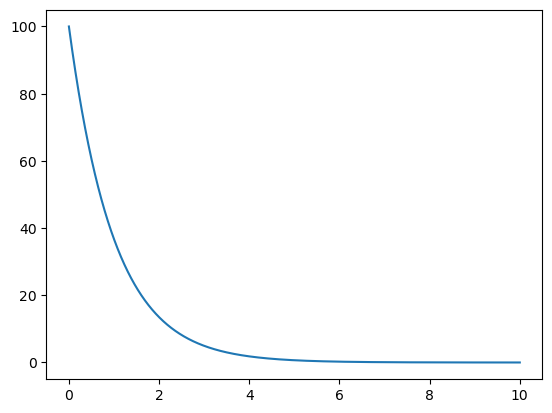

In [17]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y = explicit_euler(f,y,k)
plt.plot(t,y)

$$\frac{dy}{dt} = -y$$

$$\frac{dy}{y} = -dt$$

$$\int \frac{dy}{y} = -\int dt$$

$$\ln(y) = -t + C$$

$$y(t) = Ce^{-t}$$
$$ y(0) = 100$$

$$y(t) = 100e^{-t}$$